In [2]:
import os
import sys
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from astropy.time import Time
from astropy.io import fits
from astropy.coordinates import SkyCoord
from mpl_toolkits.basemap import Basemap

/usr/local/lib/python3.6/dist-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


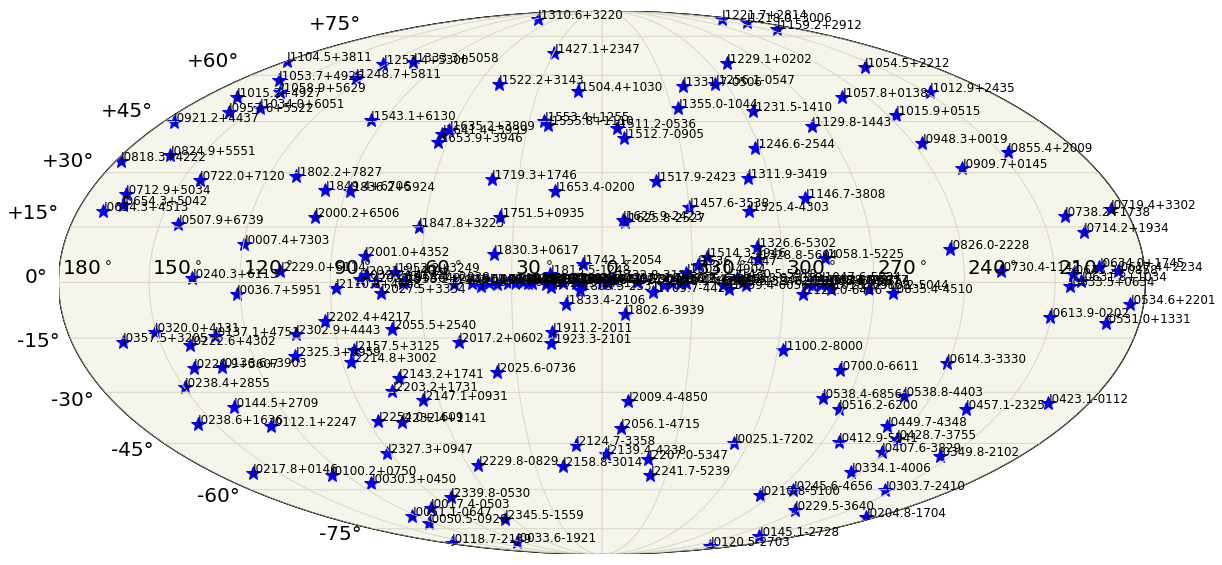

In [4]:
catalog=pd.read_csv('fermilbsl')
name=catalog['name']
ra=catalog['ra']
dec=catalog['dec']
cpos=SkyCoord(ra,dec,unit="deg")
cpos_galactic=cpos.transform_to('galactic')




fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
map = Basemap(projection='moll', lat_0=0, lon_0=0,
                            resolution='l', area_thresh=1000.0, celestial=True, ax=ax)

mysource=cpos_galactic
x,y=map(mysource.l.value,mysource.b.value)
labels=name
for i in range(x.size):
    map.plot(x[i], y[i], color='b',marker='*',markersize=15)
    plt.text(x[i], y[i], labels[i][5:],fontsize=12)	
az1 = np.arange(0,360,30)
zen1 = np.zeros(az1.size)+2
azname = []
for i in az1:
    azname.append(r'${\/%s\/^{\circ}}$'%str(i))
x1,y1 = map(az1,zen1)
for index,value in enumerate(az1):
    plt.text(x1[index],y1[index],azname[index],size = 20)
_ = map.drawmeridians(np.arange(0, 360, 30),dashes=[1,0],color='#d9d6c3')
_ = map.drawparallels(np.arange(-90, 90, 15),dashes=[1,0], labels=[1,0,0,1],color='#d9d6c3',size = 20)
map.drawmapboundary(fill_color='#f6f5ec')
plt.show()
plt.close()